<a href="https://colab.research.google.com/github/gulcan-dgn/london-crime-rate/blob/main/domestic_v%C4%B1olence_first_attempt_a_ipynb_adl%C4%B1_dosyan%C4%B1n_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis

Time series is a collection of data points collected at constant time intervals, such as the tempeture of london city centre at 1pm everyday or the closing value of a stock. These are analysed to determine the long term trend so as to forecast the future.

https://www.youtube.com/watch?v=e8Yw4alG16Q https://github.com/Jake-Young/AI-NI-Academy/blob/7704f53bed64bebe5d9fccde1061febfc315a010/Time_Series_Analysis/Time_Series_Analysis_Theory.pdfIn the cell below is the import that will be required in the following tutorial

https://www.kaggle.com/code/freespirit08/time-series-for-beginners-with-arima/notebook BEST DETAIL ONE 


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pd.__version__ == '1.0.0'

False

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/GULCAN DOGAN DISERTATION /örnek time series çalışma /AirPassengers - Copy.csv')
data


,Month,#Passengers
0,2010-03,822
1,2010-04,921
2,2010-05,870
3,2010-06,955
4,2010-07,738
...,...,...
118,2020-01,1740
119,2020-02,1489
120,2020-03,1500
121,2020-04,1243


We can see in the dataframe above that we have two columns, one represents the month of passengers flying and the second represents how many passengers flew during that month. When we look at the data type of the month column we see that it is being read in as an object. To read the month column as a time series we have to pass parameters that will fromat the colum into a datetime datatype

In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('/content/drive/MyDrive/GULCAN DOGAN DISERTATION /örnek time series çalışma /AirPassengers - Copy.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,#Passengers
Month,
2010-03-01,822
2010-04-01,921
2010-05-01,870
2010-06-01,955
2010-07-01,738


The parameters above have been broken down here and purpose explained.
1. parse_dates: This specifies the column which contains the date-time information. As we say above, the column name is ‘Month’.

2. index_col: A key idea behind using Pandas for TS data is that the index has to be the variable depicting date-time information. So this argument tells pandas to use the ‘Month’ column as index.

3. date_parser: This specifies a function which converts an input string into datetime variable. Be default Pandas reads data in format ‘YYYY-MM-DD HH:MM:SS’. If the data is not in this format, the format has to be manually defined. Something similar to the dataparse function defined here can be used for this purpose.

We will then convert the dataframe into a Series object to make it easier for us to index. This is simply making into a one dimensional array instead of the 2D array we had with the dataframe

In [ ]:
ts = data["#Passengers"] 
ts.head(10)

Month
2010-03-01    822
2010-04-01    921
2010-05-01    870
2010-06-01    955
2010-07-01    738
2010-08-01    812
2010-09-01    829
2010-10-01    833
2011-11-01    668
2010-12-01    829
Name: #Passengers, dtype: int64

To get the value in the series object, this can be done in two ways: One by using the string constant of the index and the second method is to import the datetime function from the datetime library.

In [ ]:
#subset by string constatnt of the index
ts['2010-03-01']

#using the datetime function
from datetime import datetime
ts[datetime(2010,3,1)]

822

In [ ]:
#1. Specify the entire range:
ts['2010-03-01':'2010-10-01']

#2. Use ':' if one of the indices is at ends:
ts[:'2010-10-01']

Month
2010-03-01    822
2010-04-01    921
2010-05-01    870
2010-06-01    955
2010-07-01    738
2010-08-01    812
2010-09-01    829
2010-10-01    833
Name: #Passengers, dtype: int64

## Stationarity of a Time Series

A time series has stationarity if a shift in time doesn’t cause a change in the shape of the distribution. Basic properties of the distribution like the mean , variance and covariance are constant over time. It is important as most models make the assumption that the time seies is stationary.

The mean of the series should not be a function of time rather should be a constant. The image below has the left hand graph satisfying the condition whereas the graph in red has a time dependent mean.

![title](Mean_nonstationary.png)

The variance of the series should not a be a function of time. Following graph depicts what is and what is not a stationary series.

![title](Var_nonstationary.png)

The covariance of the i th term and the (i + m) th term should not be a function of time. In the following graph, you will notice the spread becomes closer as the time increases. Hence, the covariance is not constant with time for the ‘red series’.

![title](Cov_nonstationary.png)

## Testing Stationarity 

The first step in seeing whether are data is stationary is to visualize the data, since we had previously turned the datframe into a series this is very easy to do and we can simply plot the series.

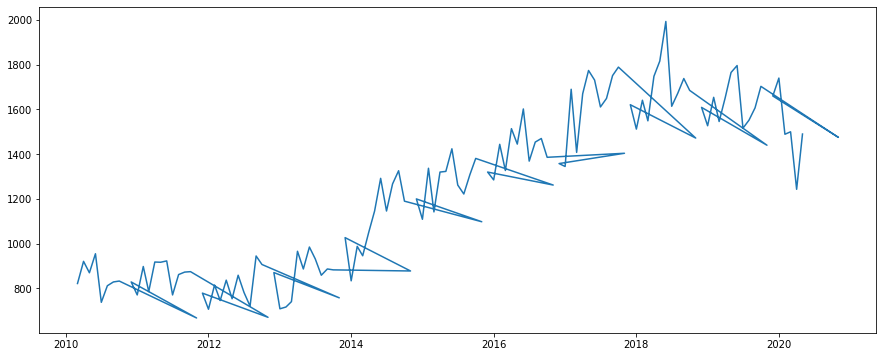

In [ ]:
plt.plot(ts)

From the graph above it is clear that there is an increasing trend, however in other datasets this may not be so clear to infer from the graph. We look at more formal methods of looking at testing stationarity which include:
   Plotting Rolling Statistic: we can plot the moving average or variance and see if it varies with time
   Dickey-Fuller Test: This is one of the statistical test of stationary. The results are composed of Test statistic
                       and a critical value. If test statistic is less than critical value we can say that the time 
                       is stationary.

**Function for testing stationarity**


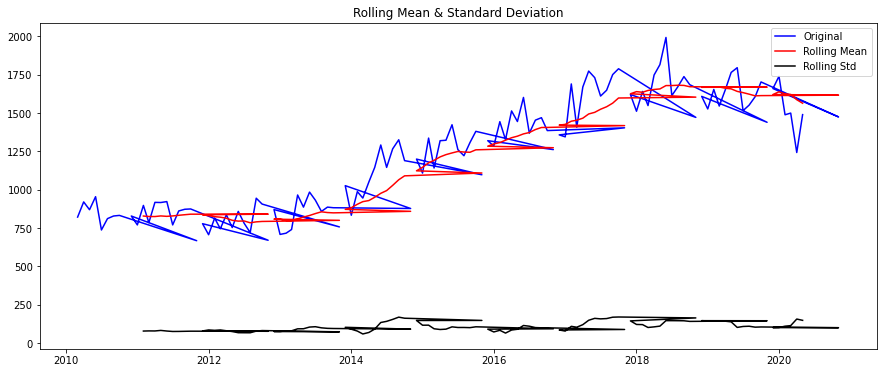

Results of Dickey-Fuller Test:
Test Statistic                  -1.120281
p-value                          0.706917
#Lags Used                      13.000000
Number of Observations Used    109.000000
Critical Value (1%)             -3.491818
Critical Value (5%)             -2.888444
Critical Value (10%)            -2.581120
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd  = timeseries.rolling(window=12).std()
   

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')

    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(ts)

## Making the Data Stationary

In most real world situations the data is unlikely to be stationary from the outset, however there have been techniques to wrangle that data to be close to stationary. Factors that make a time series non-stationary are trend and seasonality.
Trend: Varying mean over time. The price of Freddos increasing over the previous years
Seasonality: A spike in retail close to holiday times such as christmas.

To try and eliminate trend we will use transformation functions on the data the one that we will try first is a log transformation as it will penalise higher values.

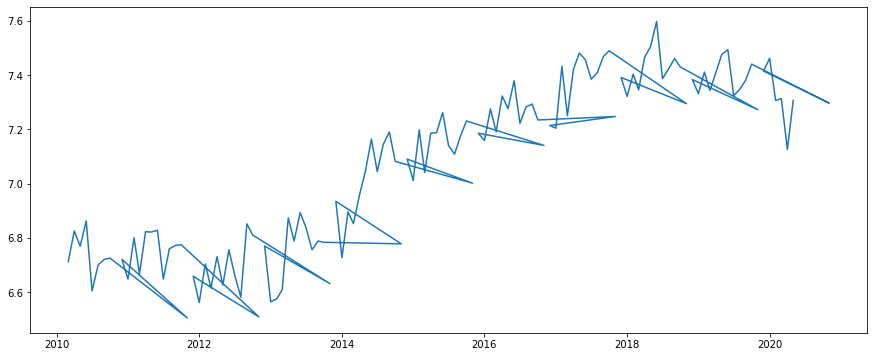

In [ ]:
ts_log = np.log(ts)
plt.plot(ts_log)

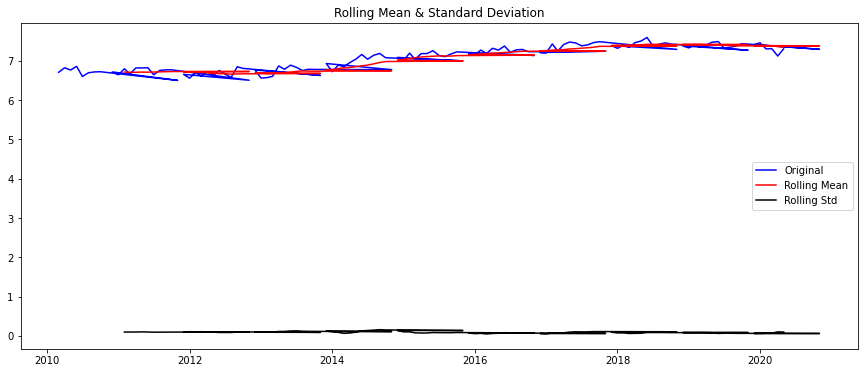

Results of Dickey-Fuller Test:
Test Statistic                  -1.072957
p-value                          0.725735
#Lags Used                      13.000000
Number of Observations Used    109.000000
Critical Value (1%)             -3.491818
Critical Value (5%)             -2.888444
Critical Value (10%)            -2.581120
dtype: float64


In [ ]:
test_stationarity(ts_log)


### Moving Average
In this approach, we take average of ‘k’ consecutive values depending on the frequency of time series. Here we can take the average over the past 1 year, i.e. last 12 values. Pandas has specific functions defined for determining rolling statistics.

In [ ]:
moving_avg=ts_log.rolling(12).mean()
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff[7:15]

Month
2010-10-01         NaN
2011-11-01         NaN
2010-12-01         NaN
2011-01-01         NaN
2011-02-01    0.084464
2011-03-01   -0.045017
2011-04-01    0.110495
2011-05-01    0.105021
Name: #Passengers, dtype: float64

The red line shows the rolling mean. Lets subtract this from the original series. Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values. This can be observed as:

In [ ]:
#dropping NAs
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Month
2011-02-01    0.084464
2011-03-01   -0.045017
2011-04-01    0.110495
2011-05-01    0.105021
2011-06-01    0.114383
Name: #Passengers, dtype: float64

The first 11 values can be dropped and then we will check the stationarity

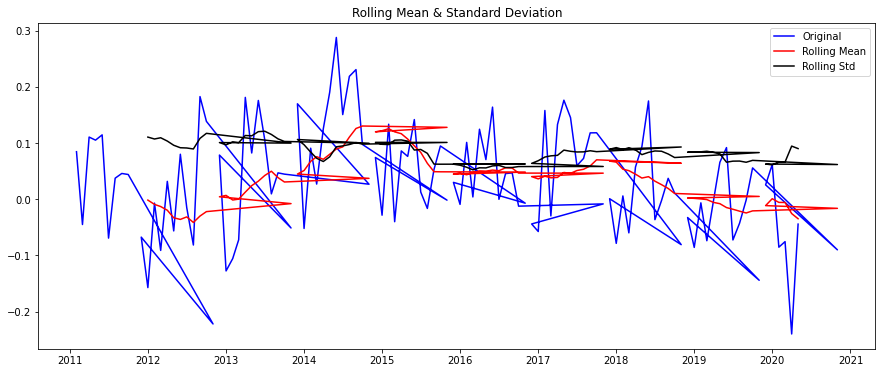

Results of Dickey-Fuller Test:
Test Statistic                  -0.986846
p-value                          0.758032
#Lags Used                      11.000000
Number of Observations Used    100.000000
Critical Value (1%)             -3.497501
Critical Value (5%)             -2.890906
Critical Value (10%)            -2.582435
dtype: float64


In [ ]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

This looks like a much better series. The rolling values appear to be varying slightly but there is no specific trend. Also, the test statistic is smaller than the 5% critical values so we can say with 95% confidence that this is a stationary series.

## Differencing

To reduce the seasonality,in this approach we take the differnce of an observation at a paticular instant with the instant before it(t - (t-1)).

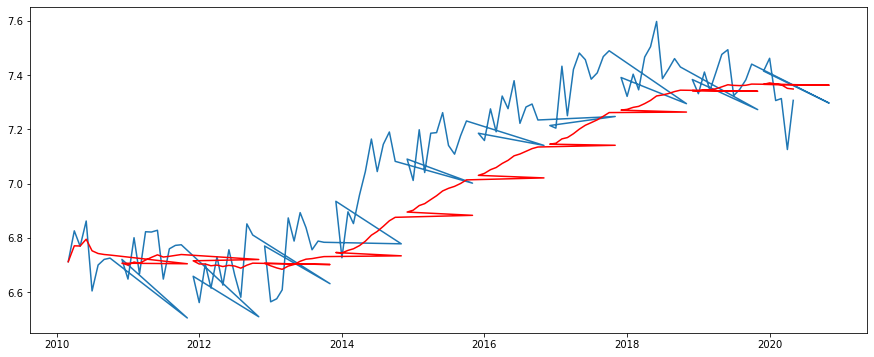

In [ ]:
expwighted_avg =ts_log.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
# expwighted_avg.plot(style='k--')

We will now check the stationairty of the Residuals, which is again what is left after trend and sesonality have been modelled seperately

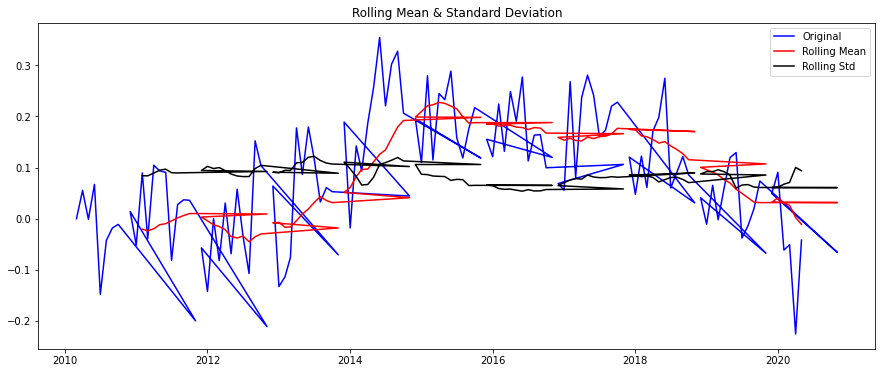

Results of Dickey-Fuller Test:
Test Statistic                  -0.921265
p-value                          0.780889
#Lags Used                      12.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [ ]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

We can see that the mean and std variations have small variations with time. Also, the Dickey-Fuller test statistic is less than the 10% critical value, thus the TS is stationary with 90% confidence

## Forecasting a Time Series

We will be using an ARIMA model, which takes the parameters: timeseries, p,d and q, these are explained in the theory notebook as well as an explanation of what an ARIMA model is. To find the parameters p and q we perform the following methods: Autocorrelation function and a Partial Autocorrelation Function. 

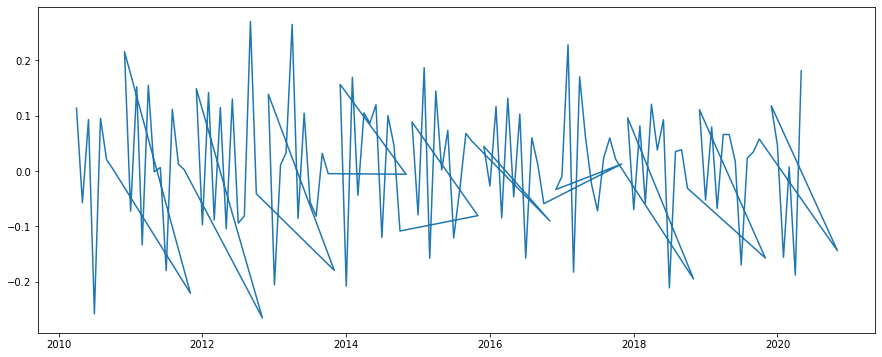

In [ ]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

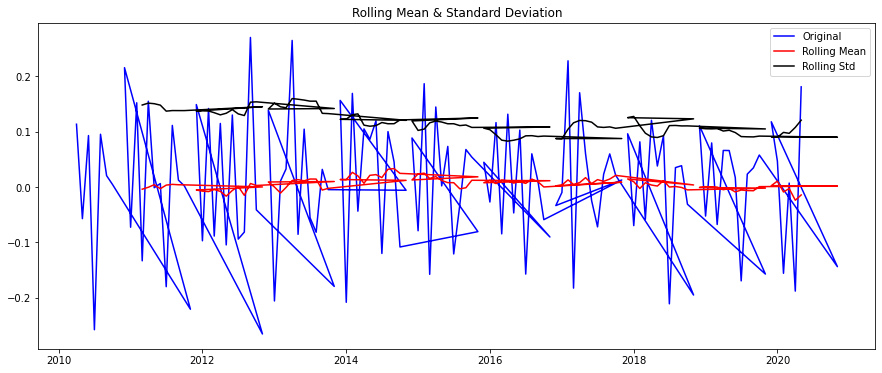

Results of Dickey-Fuller Test:
Test Statistic                  -1.694796
p-value                          0.433796
#Lags Used                      13.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64


In [ ]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

The dotted lines on the graph represent the confidence interval, these are used to determine P and Q.

q- We get from the Autocorrelation Function graph where the line crosses the upper confidence interval for the first time which in this case is 2.

p- We get from the Partial Autocorrelation Function graph where it crosses the upper confidence interval for the first time which is also 2.

### Model

<class 'pandas.core.series.Series'>
Month
2010-03-01    6.711740
2010-04-01    6.825460
2010-05-01    6.768493
2010-06-01    6.861711
2010-07-01    6.603944
                ...   
2020-01-01    7.461640
2020-02-01    7.305860
2020-03-01    7.313220
2020-04-01    7.125283
2020-05-01    7.306531
Name: #Passengers, Length: 123, dtype: float64


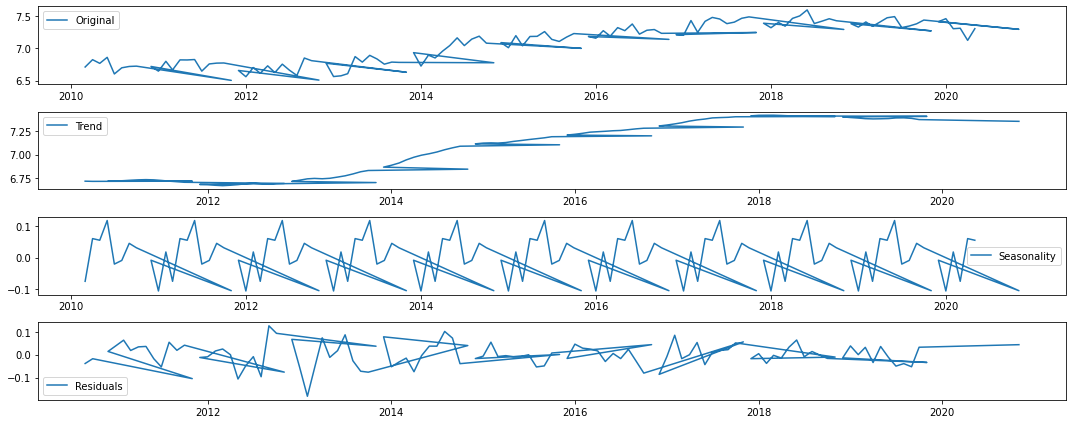

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
print(type(ts_log))
print(ts_log)
decomposition = seasonal_decompose(ts_log, freq = 12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

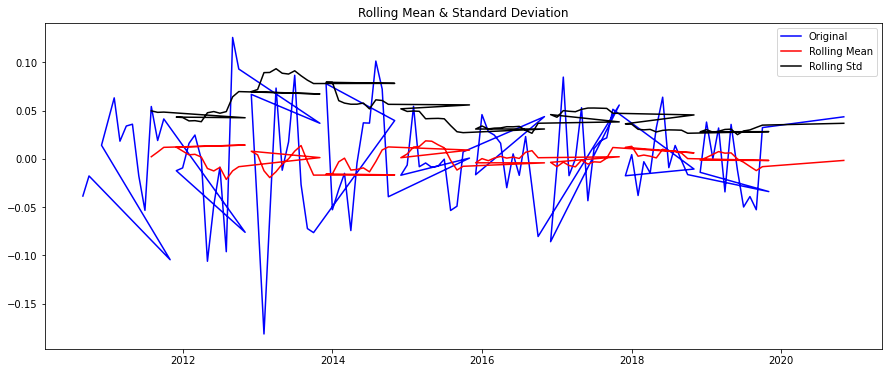

Results of Dickey-Fuller Test:
Test Statistic                -7.499683e+00
p-value                        4.286293e-11
#Lags Used                     4.000000e+00
Number of Observations Used    1.060000e+02
Critical Value (1%)           -3.493602e+00
Critical Value (5%)           -2.889217e+00
Critical Value (10%)          -2.581533e+00
dtype: float64


In [ ]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

Final Forecasting
# ACF & PACF Plots

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


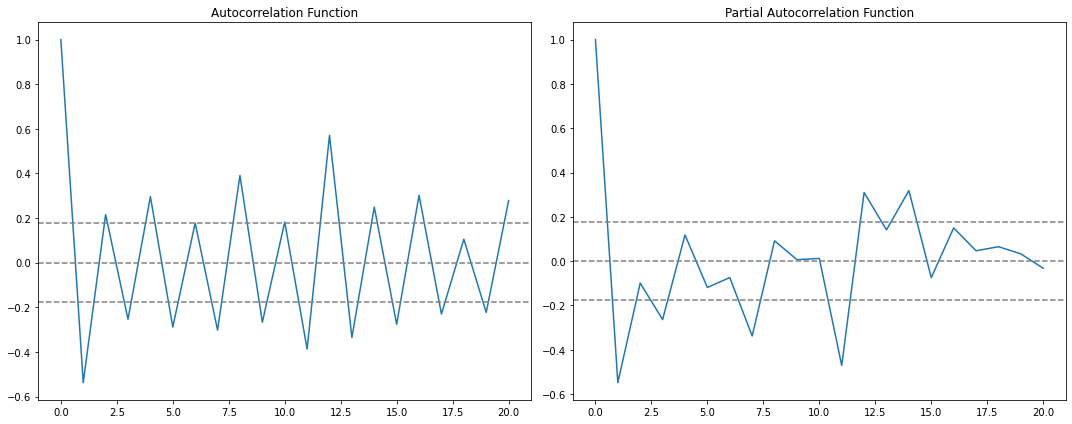

In [ ]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

The values where it first hits off 0 are the corresponding P and Q

# AR Model:

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 1.1502')

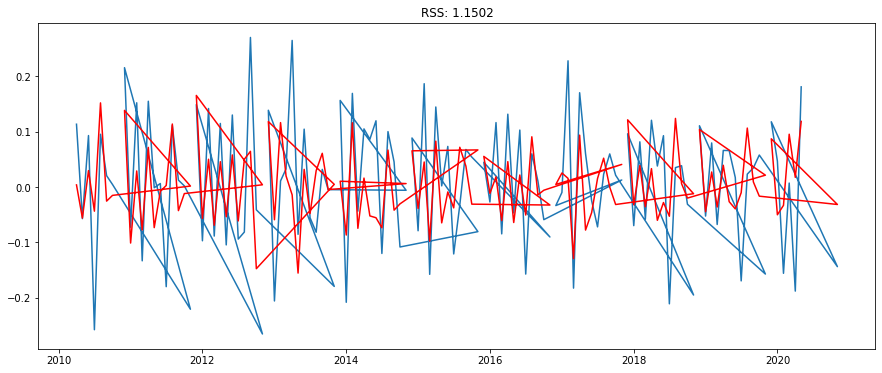

In [ ]:
#MA model:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

Greater the RSS, the more is the erroR

# MA Model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 1.1307')

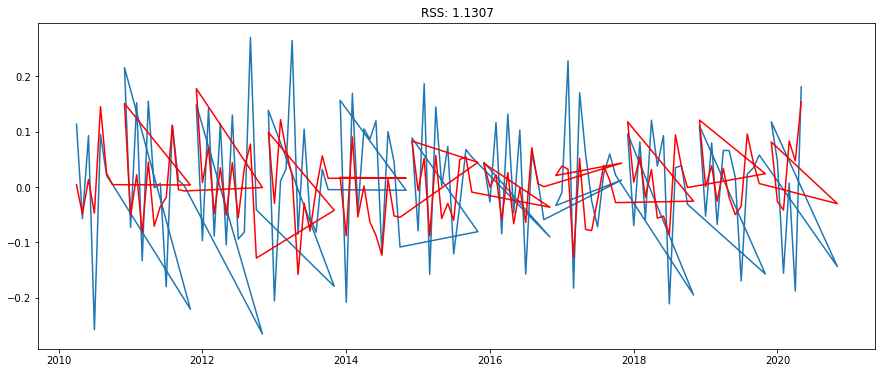

In [ ]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

# ARIMA Model:

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Text(0.5, 1.0, 'RSS: 1.1271')

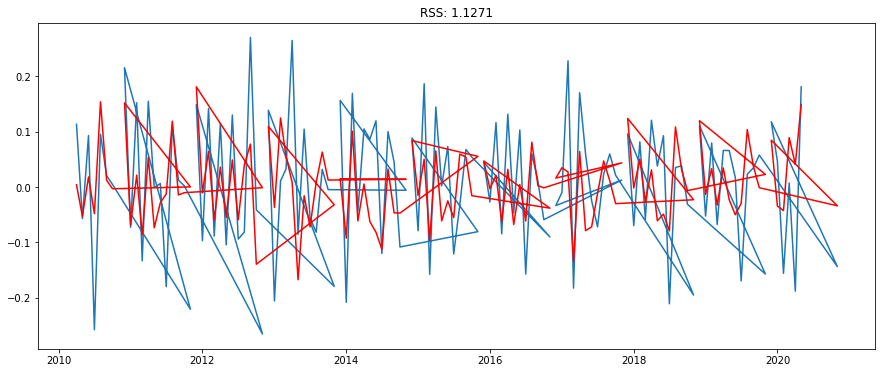

In [ ]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

# Convert to original scale:

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
2010-04-01    0.004174
2010-05-01   -0.052784
2010-06-01    0.018477
2010-07-01   -0.048065
2010-08-01    0.154244
dtype: float64


In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
2010-04-01    0.004174
2010-05-01   -0.048610
2010-06-01   -0.030133
2010-07-01   -0.078199
2010-08-01    0.076046
dtype: float64


In [ ]:
ts_log.index

DatetimeIndex(['2010-03-01', '2010-04-01', '2010-05-01', '2010-06-01',
               '2010-07-01', '2010-08-01', '2010-09-01', '2010-10-01',
               '2011-11-01', '2010-12-01',
               ...
               '2019-08-01', '2019-09-01', '2019-10-01', '2020-11-01',
               '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01'],
              dtype='datetime64[ns]', name='Month', length=123, freq=None)

In [ ]:
ts_log.iloc[0]

6.71174039505618

In [ ]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
2010-03-01    6.711740
2010-04-01    6.715915
2010-05-01    6.663130
2010-06-01    6.681607
2010-07-01    6.633542
dtype: float64

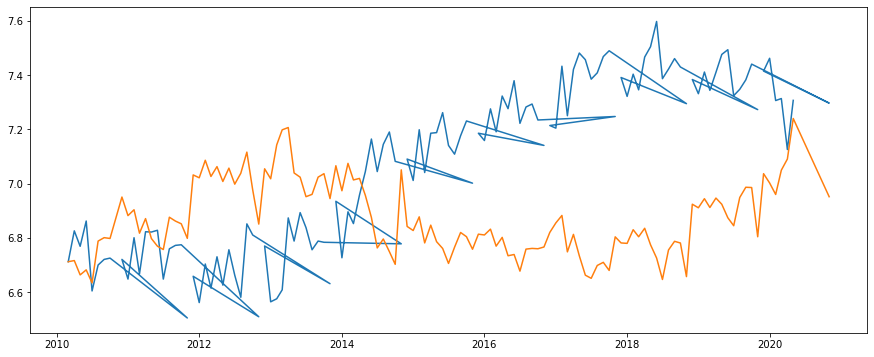

In [ ]:
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)

1226.739837398374


Text(0.5, 1.0, 'RMSE: 493.3278')

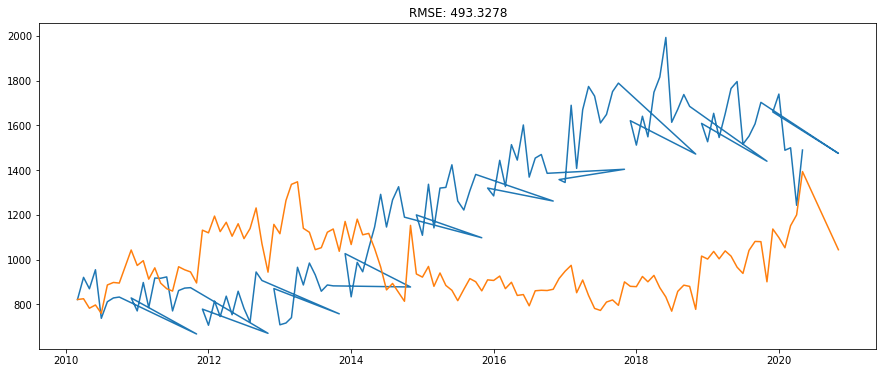

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
print(ts.mean())
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


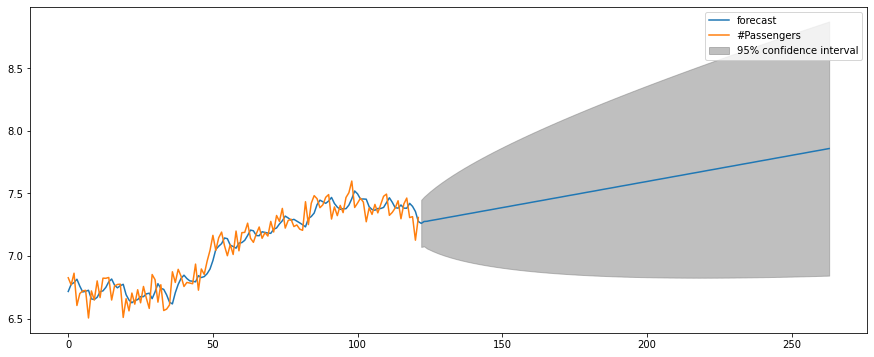

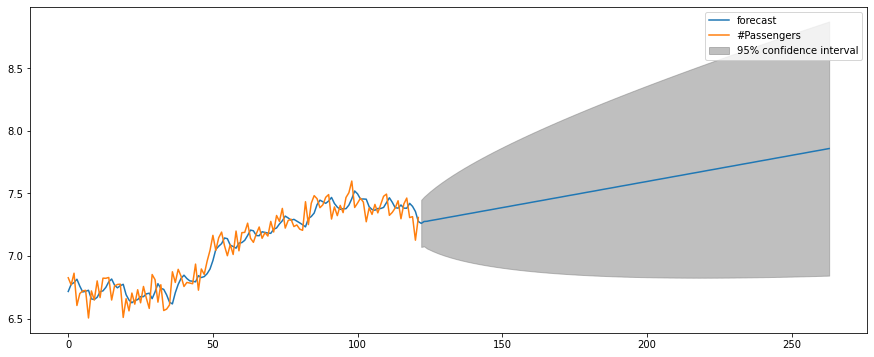

In [ ]:
results_ARIMA.plot_predict(1,264)

In [ ]:
x=results_ARIMA.forecast(steps=120)
x[1:10]

(array([0.09594336, 0.10115281, 0.1107505 , 0.11860386, 0.12614836,
        0.13323552, 0.13996644, 0.14639145, 0.15254193, 0.15845807,
        0.16415702, 0.16966864, 0.17500291, 0.18018307, 0.18521476,
        0.19011688, 0.19489227, 0.19955681, 0.20411146, 0.20856991,
        0.21293186, 0.21720934, 0.22140115, 0.22551805, 0.22955818,
        0.23353132, 0.23743514, 0.24127861, 0.24505905, 0.24878476,
        0.25245282, 0.25607098, 0.25963613, 0.26315554, 0.26662597,
        0.27005431, 0.27343719, 0.27678117, 0.28008282, 0.28334839,
        0.28657439, 0.2897668 , 0.29292212, 0.29604609, 0.29913518,
        0.30219493, 0.3052218 , 0.30822114, 0.31118939, 0.31413175,
        0.31704468, 0.31993319, 0.32279377, 0.32563129, 0.32844225,
        0.33123138, 0.33399521, 0.33673835, 0.33945734, 0.3421567 ,
        0.34483297, 0.34749057, 0.35012608, 0.3527438 , 0.35534034,
        0.35791993, 0.36047919, 0.36302227, 0.36554581, 0.36805388,
        0.37054315, 0.37301762, 0.37547399, 0.37